<a href="https://colab.research.google.com/github/freyaprabhakar/data-analytics/blob/main/F1_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project analyzes historical Formula 1 data to understand:
- Driver performance trends
- Constructor dominance
- Qualifying vs Race impact
- Strategy influence




In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd

base_path = "/content/drive/MyDrive/f1 analysis dataset/"

drivers = pd.read_csv(base_path + "drivers.csv")
constructors = pd.read_csv(base_path + "constructors.csv")
races = pd.read_csv(base_path + "races.csv")
results = pd.read_csv(base_path + "results.csv")
circuits = pd.read_csv(base_path + "circuits.csv")


In [19]:
drivers.head()
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Data Cleaning – Preparing the Results Data

Before analyzing driver performance, we need to clean the results dataset.
In this step, we:

Convert the position column into numeric format.

Remove rows where the position is missing or invalid.

In [20]:
results['position'] = pd.to_numeric(results['position'], errors='coerce')
results = results.dropna(subset=['position'])


Calculating Total Wins Per Driver

To analyze driver performance, we first identify race wins.

A race win occurs when a driver finishes in position 1.

In this step, we:

Filter the results dataset to include only rows where position = 1.

Group the data by driver.

Count how many wins each driver has.

Sort the results in descending order to identify the most successful drivers in Formula 1 history.

In [21]:
# Step 1: Filter only winning results
wins = results[results['position'] == 1]

# Step 2: Count wins per driver
wins_per_driver = wins.groupby('driverId').size()

# Step 3: Sort from highest to lowest
wins_per_driver = wins_per_driver.sort_values(ascending=False)

# Show top 10
wins_per_driver.head(10)


,0
driverId,
1,103
30,91
830,61
20,53
117,51
102,41
4,32
95,31
328,27


Merging Driver Names with Win Data

The win calculation provides results grouped by driverId.
However, driverId is only a numerical identifier and does not provide meaningful interpretation.

To improve readability and interpretability:

We merge the win statistics with the drivers dataset.

This allows us to retrieve driver names.

We then display the top-performing drivers by total wins.

This step transforms raw aggregated data into meaningful insights.

In [22]:
# Convert to DataFrame
wins_df = wins_per_driver.reset_index()
wins_df.columns = ['driverId', 'total_wins']

# Merge with drivers dataset
top_drivers = wins_df.merge(drivers, on='driverId')

# Sort again
top_drivers = top_drivers.sort_values(by='total_wins', ascending=False)

# Show top 10
top_drivers[['forename', 'surname', 'total_wins']].head(10)


,forename,surname,total_wins
0,Lewis,Hamilton,103
1,Michael,Schumacher,91
2,Max,Verstappen,61
3,Sebastian,Vettel,53
4,Alain,Prost,51
5,Ayrton,Senna,41
6,Fernando,Alonso,32
7,Nigel,Mansell,31
8,Jackie,Stewart,27
9,Niki,Lauda,25


Visualizing Top 10 Drivers by Total **Wins**

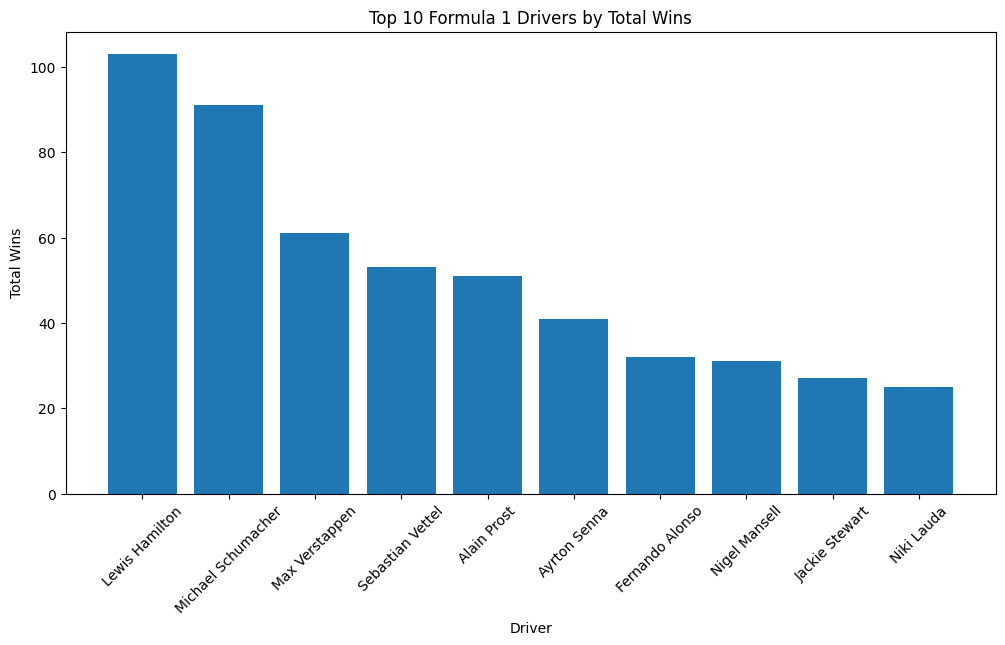

In [23]:
import matplotlib.pyplot as plt

# Take top 10
top10 = top_drivers[['forename', 'surname', 'total_wins']].head(10)

# Create full name column
top10['full_name'] = top10['forename'] + " " + top10['surname']

plt.figure(figsize=(12,6))
plt.bar(top10['full_name'], top10['total_wins'])
plt.title("Top 10 Formula 1 Drivers by Total Wins")
plt.xlabel("Driver")
plt.ylabel("Total Wins")
plt.xticks(rotation=45)
plt.show()




While race wins indicate dominance, podium finishes (top 3 positions) reflect overall consistency.

In this step:
- We calculate total podium finishes per driver.
- We compare podiums against wins for top drivers.
- This helps distinguish between dominant and consistently competitive drivers.


In [24]:
# Podiums = position 1, 2 or 3
podiums = results[results['position'] <= 3]

# Count podiums per driver
podiums_per_driver = podiums.groupby('driverId').size().reset_index()
podiums_per_driver.columns = ['driverId', 'total_podiums']


In [25]:
# Merge podium data with wins data
driver_compare = top_drivers.merge(podiums_per_driver, on='driverId')

# Take top 10 by wins
driver_compare = driver_compare.sort_values(by='total_wins', ascending=False).head(10)


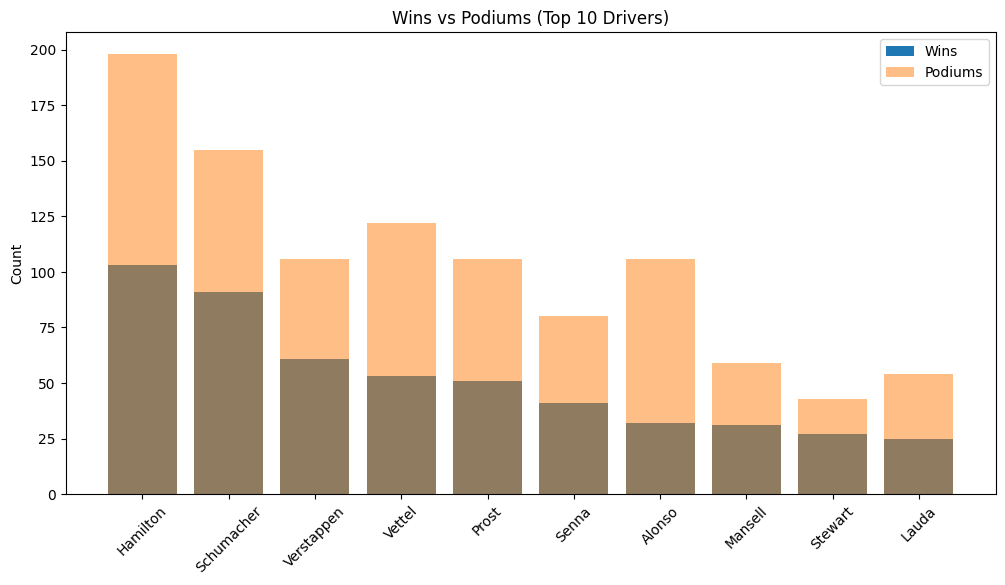

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.bar(driver_compare['surname'], driver_compare['total_wins'], label='Wins')
plt.bar(driver_compare['surname'], driver_compare['total_podiums'],
        alpha=0.5, label='Podiums')

plt.xticks(rotation=45)
plt.title("Wins vs Podiums (Top 10 Drivers)")
plt.ylabel("Count")
plt.legend()
plt.show()


**Wins Over Time (Trend Analysis)**



This analysis examines how the number of race wins per year has evolved over time.

It highlights:
- Growth in race calendar size
- Structural changes in competition
- Modern era expansion compared to early years


In [27]:
results_with_year = results.merge(races[['raceId','year']], on='raceId')
wins_yearly = results_with_year[results_with_year['position'] == 1]
wins_trend = wins_yearly.groupby('year').size()


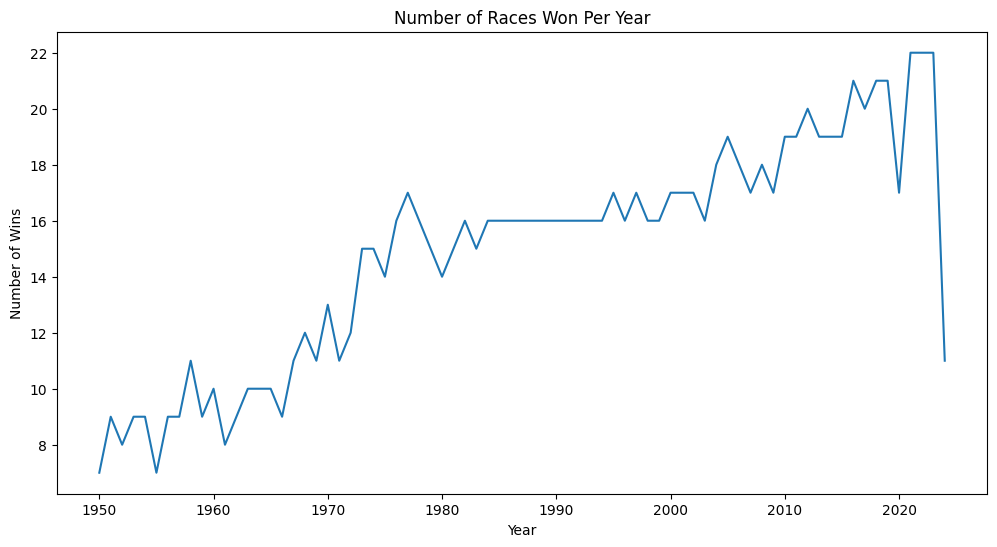

In [28]:
plt.figure(figsize=(12,6))
plt.plot(wins_trend.index, wins_trend.values)

plt.title("Number of Races Won Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.show()




This heatmap visualizes the number of race wins per year for the top 10 drivers.

It helps identify:
- Dominant eras
- Peak performance periods
- Shifts in competitive dominance

Darker regions represent higher win counts.


In [29]:
import seaborn as sns

# Get top 10 driver IDs
top10_ids = top_drivers.head(10)['driverId']

# Filter wins only
top10_wins = results_with_year[
    (results_with_year['driverId'].isin(top10_ids)) &
    (results_with_year['position'] == 1)
]

# Create pivot table: rows = driver, columns = year
heatmap_data = top10_wins.groupby(['driverId','year']).size().unstack(fill_value=0)

# Add driver names for readability
heatmap_data = heatmap_data.merge(
    drivers[['driverId','surname']],
    on='driverId'
).set_index('surname')

heatmap_data = heatmap_data.drop(columns=['driverId'])


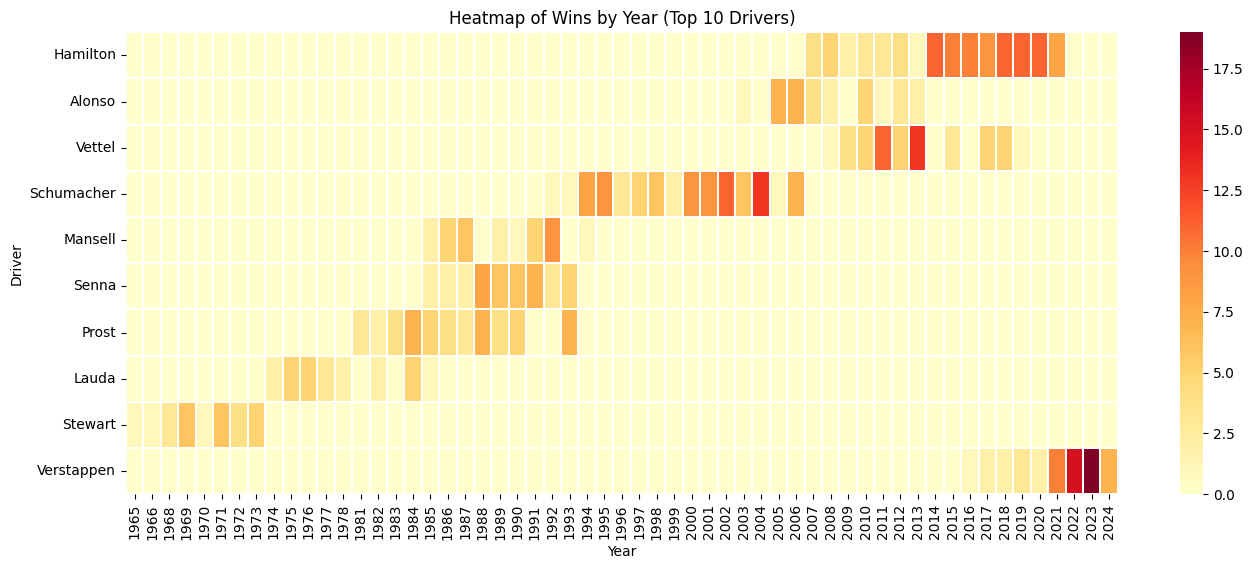

In [30]:
plt.figure(figsize=(16,6))

sns.heatmap(heatmap_data,
            cmap="YlOrRd",
            linewidths=0.3)

plt.title("Heatmap of Wins by Year (Top 10 Drivers)")
plt.xlabel("Year")
plt.ylabel("Driver")
plt.show()




To enhance usability, an interactive function is created.

The user can input a driver’s name and dynamically retrieve:

- Total races
- Total wins
- Total podiums
- Average finishing position
- Win percentage

Additionally, a personal win trend visualization is generated.


In [31]:
def driver_stats(driver_name):

    # Split name
    name_parts = driver_name.split(" ")
    if len(name_parts) < 2:
        print("Please enter full name (e.g., Lewis Hamilton)")
        return

    forename = name_parts[0]
    surname = name_parts[1]

    # Find driver
    driver_row = drivers[
        (drivers['forename'].str.lower() == forename.lower()) &
        (drivers['surname'].str.lower() == surname.lower())
    ]

    if driver_row.empty:
        print("Driver not found.")
        return

    driver_id = driver_row.iloc[0]['driverId']

    # Get driver results
    driver_results = results_with_year[results_with_year['driverId'] == driver_id]

    total_races = len(driver_results)
    total_wins = len(driver_results[driver_results['position'] == 1])
    total_podiums = len(driver_results[driver_results['position'] <= 3])
    avg_position = driver_results['position'].mean()
    win_percentage = (total_wins / total_races) * 100 if total_races > 0 else 0

    print(f"\nPerformance Summary for {driver_name}")
    print("--------------------------------------")
    print(f"Total Races: {total_races}")
    print(f"Total Wins: {total_wins}")
    print(f"Podiums: {total_podiums}")
    print(f"Average Finish Position: {round(avg_position,2)}")
    print(f"Win Percentage: {round(win_percentage,2)}%")

    # Plot wins over time for this driver
    yearly_wins = driver_results[driver_results['position'] == 1].groupby('year').size()

    plt.figure(figsize=(10,5))
    plt.plot(yearly_wins.index, yearly_wins.values)
    plt.title(f"{driver_name} - Wins Over Time")
    plt.xlabel("Year")
    plt.ylabel("Wins")
    plt.show()



Performance Summary for Max Verstappen
--------------------------------------
Total Races: 166
Total Wins: 61
Podiums: 106
Average Finish Position: 3.54
Win Percentage: 36.75%


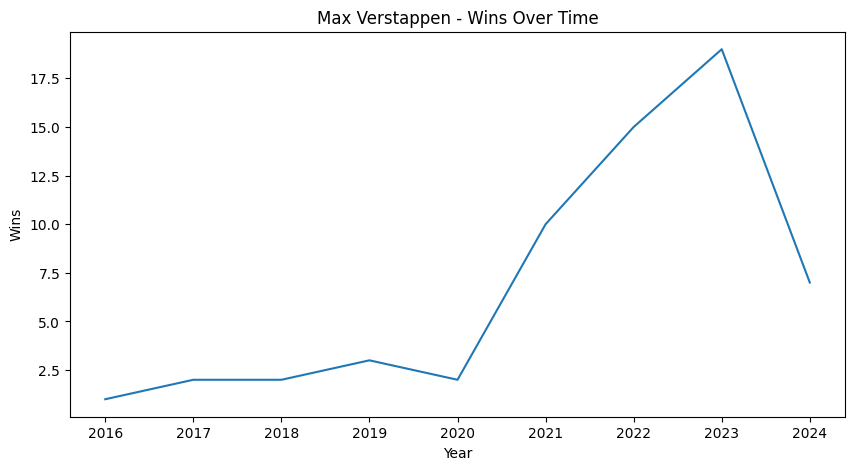

In [32]:
driver_stats("Max Verstappen")
